In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [141]:
df=pd.read_excel('data/CCIHE2021-PublicData.xlsx',sheet_name='Data') # Carnegie university clasification as dataframe

In [142]:
df.head()

,unitid,name,city,stabbr,basic2000,basic2005,basic2010,basic2015,basic2018,basic2021,...,satv25,satm25,satcmb25,actcmp25,satacteq25,actfinal,appsf20,admitsf20,pctadmitf20,selindex
0,100654,Alabama A & M University,Normal,AL,16,18,18,18,18,18,...,430.0,410.0,840.0,15.0,15.0,15.000000,9855.0,8835.0,0.896499,1.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,15,15,15,15,15,15,...,560.0,530.0,1090.0,22.0,21.0,21.875310,10391.0,8375.0,0.805986,2.0
2,100690,Amridge University,Montgomery,AL,51,24,24,20,20,20,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,16,16,15,16,16,15,...,590.0,580.0,1170.0,24.0,24.0,24.000000,5793.0,4467.0,0.771103,3.0
4,100724,Alabama State University,Montgomery,AL,21,18,18,19,19,17,...,438.0,406.0,840.0,14.0,15.0,14.298675,7027.0,6948.0,0.988758,1.0


In [143]:
df.columns  #Returns the names of all the columns.

Index(['unitid', 'name', 'city', 'stabbr', 'basic2000', 'basic2005',
       'basic2010', 'basic2015', 'basic2018', 'basic2021',
       ...
       'satv25', 'satm25', 'satcmb25', 'actcmp25', 'satacteq25', 'actfinal',
       'appsf20', 'admitsf20', 'pctadmitf20', 'selindex'],
      dtype='object', length=103)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Columns: 103 entries, unitid to selindex
dtypes: float64(32), int64(68), object(3)
memory usage: 3.1+ MB


In [145]:
df.stabbr.unique()  #list of all states and territories mentioned in the data.

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'DE',
       'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'MO', 'KY',
       'LA', 'ME', 'MD', 'MA', 'MI', 'MS', 'MT', 'NE', 'NV', 'NH', 'NJ',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

Besides the 50 US states and DC, this array includes other US territories as well. College board either does not include these territories in their data or combine them together to "US territories" column. So, probably we would want to ignore them. It seems they all appear after 'WY' in the above list of states and territories.

In [146]:
territories = ['AS','GU','MP','FM','PW','VI','MH','PR']  #US territories that appear in the data (excluding DC)

In [147]:
df[df['basic2021'].isin([15,16])].stabbr.unique()  #The states that contain R1/R2 universities in 2021.

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

In [148]:
df = df.drop(df[df['stabbr'].isin(territories)].index)  #Drop all the states from the list "territories"

In [149]:
df.stabbr.unique()  #Now we can see there are exactly 51 unique entries in stabbr.

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'DE',
       'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'MO', 'KY',
       'LA', 'ME', 'MD', 'MA', 'MI', 'MS', 'MT', 'NE', 'NV', 'NH', 'NJ',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WV', 'WI', 'WY'], dtype=object)

In [150]:
carnegie21=df[['name','city','stabbr','basic2021']]  #New dataframe with only basic classification in 2021

In [151]:
carnegie21.head(n=5)

,name,city,stabbr,basic2021
0,Alabama A & M University,Normal,AL,18
1,University of Alabama at Birmingham,Birmingham,AL,15
2,Amridge University,Montgomery,AL,20
3,University of Alabama in Huntsville,Huntsville,AL,15
4,Alabama State University,Montgomery,AL,17


In [152]:
carnegieR1R2=carnegie21.loc[carnegie21['basic2021'].isin([15,16])]  #New dataframe with only R1/R2 universities under basic2021 classification

In [153]:
len(carnegieR1R2.index)  #Altogether, there are 278 R1/R2 universities.

278

In [154]:
R1R2count = {'stabbr':[],'R1count':[],'R2count':[]}
for i in carnegieR1R2.stabbr.unique():
    R1R2count['stabbr'].append(i)
    R1R2count['R1count'].append(len(carnegieR1R2.loc[carnegieR1R2.stabbr.eq(i) & carnegieR1R2.basic2021.eq(15)]))
    R1R2count['R2count'].append(len(carnegieR1R2.loc[carnegieR1R2.stabbr.eq(i) & carnegieR1R2.basic2021.eq(16)]))

R1R2count=pd.DataFrame(R1R2count)
R1R2count['R1plusR2']=R1R2count.R1count+R1R2count.R2count

#Here we created a new dataframe counting R1/R2 universities in each of the 51 states and territories

In [155]:
print(R1R2count.head())

  stabbr  R1count  R2count  R1plusR2
0     AL        4        1         5
1     AK        0        1         1
2     AZ        2        2         4
3     AR        1        2         3
4     CA       11       14        25


In [156]:
percapita=pd.read_excel('data/Table.xlsx')  #Geographical Regions (including states) of the US with per capita income

In [157]:
percapita

,GeoFips,GeoName,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,00000,United States,24725.0,25925.0,27493.0,28592.0,30551.0,31548.0,31801.0,32659.0,...,39307.0,40557.0,42649.0,44237.0,44401.0,46287.0,48060.0,48971.0,51004.0,53309.0
1,01000,Alabama,20599.0,21487.0,22651.0,23296.0,24258.0,25046.0,25671.0,26700.0,...,32717.0,33849.0,34887.0,35564.0,35713.0,36729.0,38197.0,38712.0,39975.0,41330.0
2,02000,Alaska *,26910.0,28219.0,29287.0,29941.0,31996.0,33591.0,34766.0,36045.0,...,47211.0,49543.0,52415.0,53340.0,52252.0,55098.0,56714.0,55535.0,56499.0,58997.0
3,04000,Arizona,21681.0,22757.0,24130.0,24866.0,26271.0,26946.0,27325.0,28384.0,...,33467.0,33774.0,35244.0,36333.0,36877.0,38220.0,39836.0,41122.0,43208.0,45260.0
4,05000,Arkansas,19427.0,20176.0,21203.0,21842.0,22731.0,23841.0,24280.0,25564.0,...,31411.0,32218.0,34180.0,36287.0,36285.0,38218.0,39266.0,40179.0,41402.0,43029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Legend / Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2. Per capita personal income is total persona...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,* Estimates prior to 1950 are not available fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Note. All dollar estimates are in millions of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
percapita=percapita.iloc[1:52].reset_index()  #Pick out only the rows corresponding to the states (including DC, excluding other territories). The index starts from 1, so reset_index() resets to 0.

In [159]:
percapita.head()

,index,GeoFips,GeoName,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,01000,Alabama,20599.0,21487.0,22651.0,23296.0,24258.0,25046.0,25671.0,...,32717.0,33849.0,34887.0,35564.0,35713.0,36729.0,38197.0,38712.0,39975.0,41330.0
1,2,02000,Alaska *,26910.0,28219.0,29287.0,29941.0,31996.0,33591.0,34766.0,...,47211.0,49543.0,52415.0,53340.0,52252.0,55098.0,56714.0,55535.0,56499.0,58997.0
2,3,04000,Arizona,21681.0,22757.0,24130.0,24866.0,26271.0,26946.0,27325.0,...,33467.0,33774.0,35244.0,36333.0,36877.0,38220.0,39836.0,41122.0,43208.0,45260.0
3,4,05000,Arkansas,19427.0,20176.0,21203.0,21842.0,22731.0,23841.0,24280.0,...,31411.0,32218.0,34180.0,36287.0,36285.0,38218.0,39266.0,40179.0,41402.0,43029.0
4,5,06000,California,25864.0,26979.0,28901.0,30529.0,33175.0,33915.0,34047.0,...,41660.0,43138.0,45509.0,47794.0,48076.0,50619.0,53817.0,55863.0,58214.0,60984.0


In [160]:
R1R2count['pci2018']=percapita['2018']  #adjoin the per capita on 2018 into one of the columns of R1R2count dataframe

In [161]:
R1R2count.head()

,stabbr,R1count,R2count,R1plusR2,pci2018
0,AL,4,1,5,41330.0
1,AK,0,1,1,58997.0
2,AZ,2,2,4,45260.0
3,AR,1,2,3,43029.0
4,CA,11,14,25,60984.0


In [162]:
uspop = pd.read_excel('data/us_population.xlsx')  #States of the US by population
uspop.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,.Alabama,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,.Alaska,710231,710249,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,.Arizona,6392017,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,.Arkansas,2915918,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,.California,37253956,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


In [163]:
R1R2count['R1R2bypop']=R1R2count['R1plusR2']*10000000/uspop[2019]  #Create a new column for the number of R1/R2 universities per 10 million population

In [164]:
R1R2count.head()

,stabbr,R1count,R2count,R1plusR2,pci2018,R1R2bypop
0,AL,4,1,5,41330.0,10.197453
1,AK,0,1,1,58997.0,13.669699
2,AZ,2,2,4,45260.0,5.495474
3,AR,1,2,3,43029.0,9.941003
4,CA,11,14,25,60984.0,6.327156


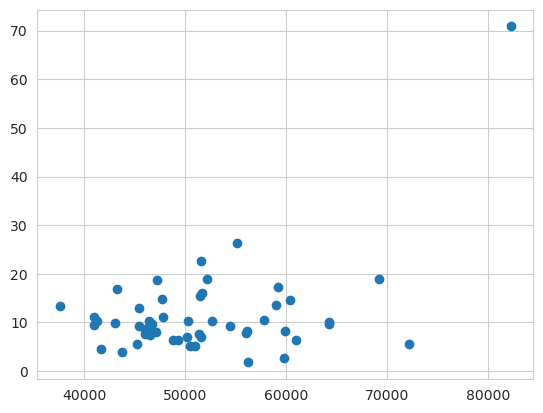

In [165]:
plt.scatter(R1R2count.pci2018,R1R2count.R1R2bypop)  #Number of R1/R2 universities per 10,000,000 population vs per capita income

It seems DC is an outlier -- it is really a city masquerading as a 'state'. Naturally, the density of R1/R2 universities is going to be quite higher there. So, it might be prudent to exclude it from our analysis?

In [166]:
r1r2wodc=R1R2count.loc[R1R2count['stabbr']!='DC']  #New dataframe excluding DC
r1r2wodc.head()

,stabbr,R1count,R2count,R1plusR2,pci2018,R1R2bypop
0,AL,4,1,5,41330.0,10.197453
1,AK,0,1,1,58997.0,13.669699
2,AZ,2,2,4,45260.0,5.495474
3,AR,1,2,3,43029.0,9.941003
4,CA,11,14,25,60984.0,6.327156


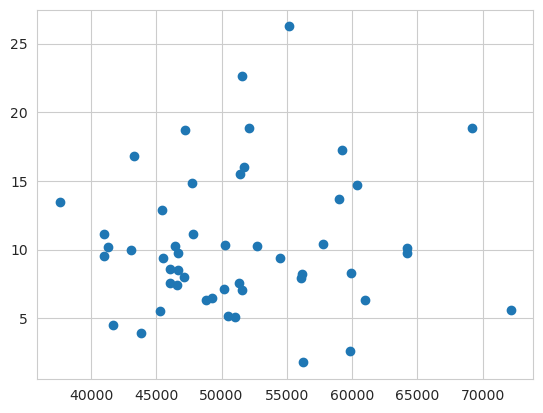

In [167]:
plt.scatter(r1r2wodc.pci2018,r1r2wodc.R1R2bypop)  #Number of R1/R2 universities per 10,000,000 population vs per capita income, but this time DC excluded

### Interestingly, the relationship between density of R1/R2 universities and per capita income seems more random than what one might intuit.

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
slr = LinearRegression()

In [170]:
slr.fit(r1r2wodc[['pci2018']],r1r2wodc.R1R2bypop)

LinearRegression()

In [171]:
print(slr.coef_)
print(slr.intercept_)

[4.21850139e-05]
8.268584808168457


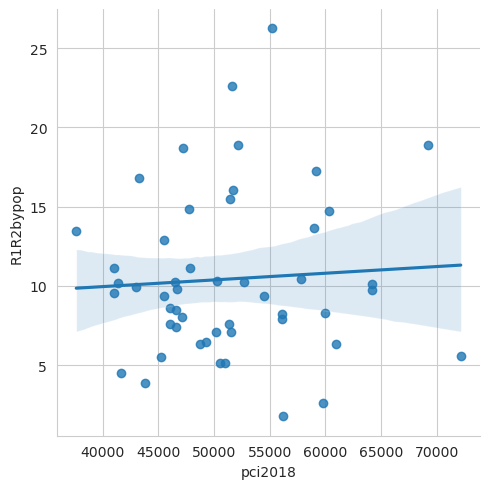

In [172]:
sns.lmplot(data = r1r2wodc, x= 'pci2018', y = 'R1R2bypop')

### Indeed, we can visually see via plotting the linear fitted line that the relationship between per capita income and density of R1/R2 universities is not quite as expected.

In [ ]:
ap_performance = pd.read_excel('data/ap-performance-2012-2022.xlsx')  #Reading the ap-performance excel file

In [21]:
ap_performance.head()  #Unfortunately, the data is not organized an conveniently as the Carnegie classification data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,AP Performance,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Total AP Exams,NaN,NaN,NaN
4,NaN,NaN,NaN,2022,2021,2017,2012
